### 1. Importing libraries and data

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import plotly.express as px

In [57]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [58]:
# create Path
path=r'C:\online course\CH6'

In [59]:
#Importing datasets
df = pd.read_csv(os.path.join(path,'02_data','Prepared_data','Customer_Records.csv'))

In [60]:
df.head()

Unnamed: 0  CustomerID  CreditScore Geography  Gender  Age  Tenure  \
0           0    15634602          619    France  Female   42       2   
1           1    15647311          608     Spain  Female   41       1   
2           2    15619304          502    France  Female   42       8   
3           3    15701354          699    France  Female   39       1   
4           4    15737888          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Complain  Satisfaction Score Card Type  Point Earned  
0       1         1                   2   DIAMOND           464  
1       0         1                   3   DIAMOND           456  
2       1         1                   3   DIAMOND           377  
3       0         0                   5      GOLD           350  
4       0         0                   5      GOLD           425

In [61]:
df = df.drop('Unnamed: 0', axis=1)

In [62]:
df.head()

CustomerID  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15634602          619    France  Female   42       2       0.00   
1    15647311          608     Spain  Female   41       1   83807.86   
2    15619304          502    France  Female   42       8  159660.80   
3    15701354          699    France  Female   39       1       0.00   
4    15737888          850     Spain  Female   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Complain  Satisfaction Score Card Type  Point Earned  
0         1                   2   DIAMOND           464  
1         1                   3   DIAMOND           456  
2         1                   3   DIAMOND           377  
3         0                   5      GOLD           350  
4         0                   5      GOLD           425

In [63]:
# Drop categorical columns

df.drop(['CustomerID', 'Geography', 'Gender', 'HasCrCard','IsActiveMember','Exited','Complain','Satisfaction Score','Card Type'], axis=1, inplace=True)

In [64]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0          619   42       2       0.00              1        101348.88   
1          608   41       1   83807.86              1        112542.58   
2          502   42       8  159660.80              3        113931.57   
3          699   39       1       0.00              2         93826.63   
4          850   43       2  125510.82              1         79084.10   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

## 2. Standardizing data

In [65]:
# Use Standard Scaler to standardize data in the dataframe

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [66]:
# Fit standardized data using PCA

pca = PCA()
pca.fit(segmentation_std)

PCA()

In [67]:
# Show how much variance is explained by each of the seven components

pca.explained_variance_ratio_

array([0.18751771, 0.14508962, 0.14314725, 0.1428314 , 0.14148606,
       0.14077697, 0.09915098])

Text(0, 0.5, 'Cumulative Explained Variance')

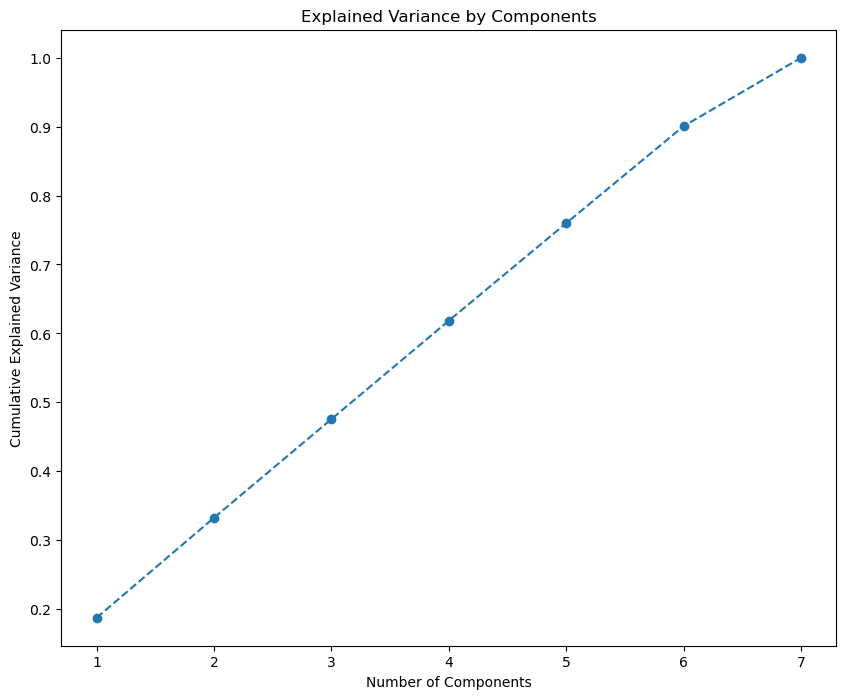

In [68]:
plt.figure(figsize = (10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Choosing five components is sufficient here, as they preserve about 80 % of the variance.

In [69]:
# Choice of five components based on the above findings

pca = PCA(n_components = 5)

In [70]:
# Fit model to data

pca.fit(segmentation_std)

PCA(n_components=5)

In [71]:
# Extract calculated resulting components for our data set

pca.transform(segmentation_std)

array([[ 0.15049954,  0.64837117,  0.56628358, -0.04703113,  0.61651387],
       [-0.79217411,  0.55552445,  0.51336653,  0.15439866,  0.77559882],
       [ 0.91199616, -0.89034166,  1.82842679,  0.19405679, -0.00538956],
       ...,
       [ 0.31316319,  0.00249714, -0.19820608, -1.0664669 , -0.89419046],
       [ 0.59631474,  0.15306064, -0.40895842, -1.35636538,  1.0829616 ],
       [-1.19854527,  0.59806522, -2.11127115, -0.38914731, -1.20708676]])

In [72]:
scores_pca = pca.transform(segmentation_std)

## 3 Examining data with elbow technique for k-means clustering

In [73]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [74]:
score = [kmeans[i].fit(scores_pca).score(scores_pca) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\j28c1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\j28c1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\j28c1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\j28c1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\j28c1\anaconda3\lib\site-packages\sklearn\clust

[-53205.043718919864,
 -43380.138502850044,
 -38463.20494885858,
 -35150.19181959109,
 -32288.236382913037,
 -29948.57937954821,
 -28102.72026144604,
 -26560.792318530443,
 -25210.50164557867]

In [75]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve becomes smoother after three clusters (x-axis in clusters number of 3 is -38462.66030551321, x-axis in clusters number of 2 is -35150.254843848576 , we could see that the curve gradually starts to decrease.).So we choose the optimal number of clusters is 3.

## 3 K-means clustering

In [76]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3,n_init=10) 

In [77]:
# Fit the k-means object to the data.

kmeans.fit(scores_pca)

KMeans(n_clusters=3, n_init=10)

In [78]:
df_kmeans_pca = pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)], axis = 1)
df_kmeans_pca.columns.values[-2: ] = ['Component 1', 'Component 2']
df_kmeans_pca['Cluster Labels k-means PCA'] = kmeans.labels_

In [79]:
df_kmeans_pca.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0          619   42       2       0.00              1        101348.88   
1          608   41       1   83807.86              1        112542.58   
2          502   42       8  159660.80              3        113931.57   
3          699   39       1       0.00              2         93826.63   
4          850   43       2  125510.82              1         79084.10   

   Point Earned         0         1         2  Component 1  Component 2  \
0           464  0.150500  0.648371  0.566284    -0.047031     0.616514   
1           456 -0.792174  0.555524  0.513367     0.154399     0.775599   
2           377  0.911996 -0.890342  1.828427     0.194057    -0.005390   
3           350  1.413854  0.680607 -0.000884    -0.705971     1.011866   
4           425 -1.218370  0.407765 -1.219573    -1.726225     1.062540   

   Cluster Labels k-means PCA  
0                           0  
1                           2  
2                           0  
3                           0  
4                           1

In [98]:
# Create a new Segment column for easier cluster readabilty

df_kmeans_pca['clusters'] = df_kmeans_pca['Cluster Labels k-means PCA']

In [99]:
df_kmeans_pca['clusters'].value_counts()

1    3365
2    3349
0    3286
Name: clusters, dtype: int64

In [100]:
df_kmeans_pca.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  EstimatedSalary  \
0          619   42       2       0.00              1        101348.88   
1          608   41       1   83807.86              1        112542.58   
2          502   42       8  159660.80              3        113931.57   
3          699   39       1       0.00              2         93826.63   
4          850   43       2  125510.82              1         79084.10   

   Point Earned         0         1         2  Component 1  Component 2  \
0           464  0.150500  0.648371  0.566284    -0.047031     0.616514   
1           456 -0.792174  0.555524  0.513367     0.154399     0.775599   
2           377  0.911996 -0.890342  1.828427     0.194057    -0.005390   
3           350  1.413854  0.680607 -0.000884    -0.705971     1.011866   
4           425 -1.218370  0.407765 -1.219573    -1.726225     1.062540   

   Cluster Labels k-means PCA  clusters  
0                           0         0  
1                           2         2  
2                           0         0  
3                           0         0  
4                           1         1

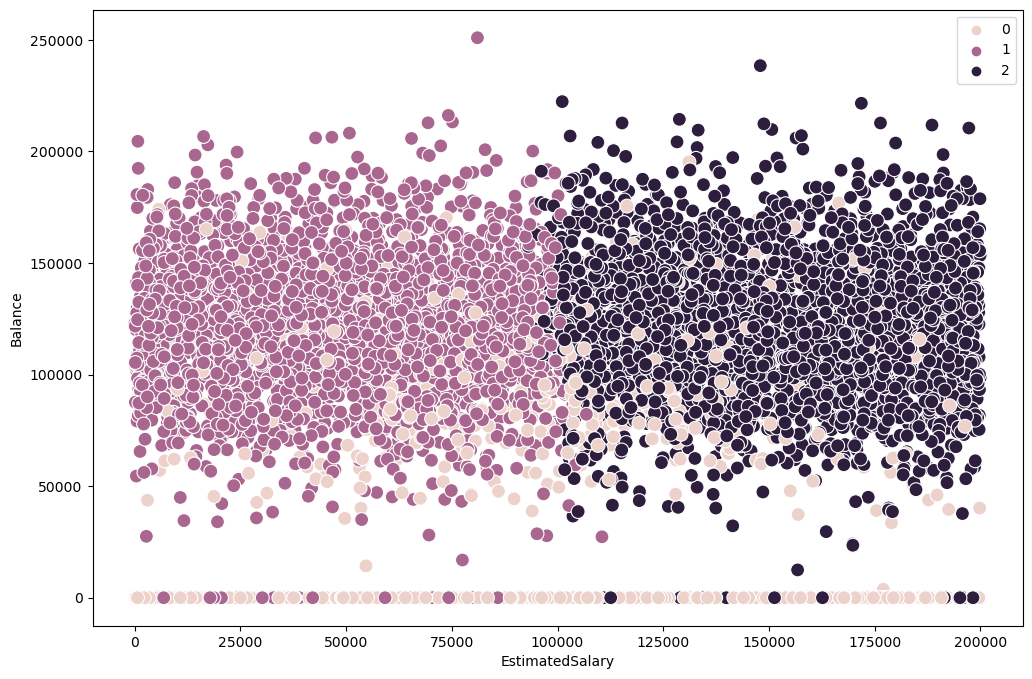

In [101]:
# Plot the clusters for the "EstimatedSalary" and "Balance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['EstimatedSalary'], y=df['Balance'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('EstimatedSalary') # Label x-axis.
plt.ylabel('Balance') # Label y-axis.
plt.show()

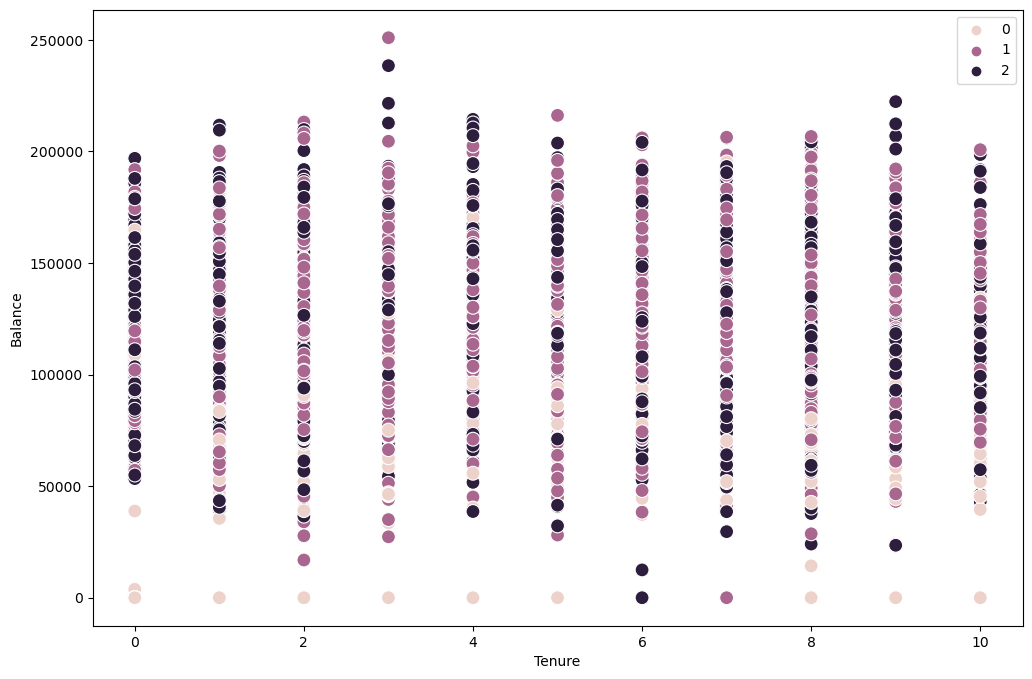

In [102]:
# Plot the clusters for the "Tenure" and "Balance" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Tenure'], y=df['Balance'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Tenure') # Label x-axis.
plt.ylabel('Balance') # Label y-axis.
plt.show()

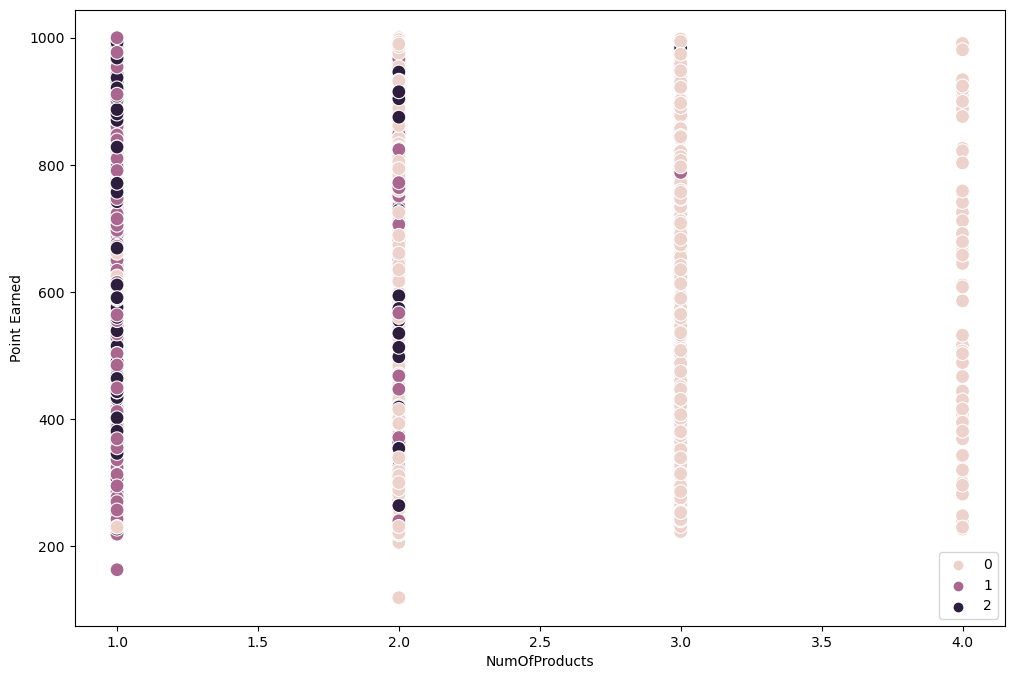

In [103]:
# Plot the clusters for the "NumOfProducts" and "Point Earned" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['NumOfProducts'], y=df['Point Earned'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('NumOfProducts') # Label x-axis.
plt.ylabel('Point Earned') # Label y-axis.
plt.show()

In [104]:
# Plot the clusters for the "EstimatedSalary" and "Point Earned" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['EstimatedSalary'], y=df['Point Earned'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('EstimatedSalary') # Label x-axis.
plt.ylabel('Point Earned') # Label y-axis.
plt.show()

In [109]:
df_kmeans_pca.loc[df_kmeans_pca['clusters'] == 2, 'cluster'] = 'black'
df_kmeans_pca.loc[df_kmeans_pca['clusters'] == 1, 'cluster'] = 'purple'
df_kmeans_pca.loc[df_kmeans_pca['clusters'] == 0, 'cluster'] = 'pink'

In [110]:
# Examine descriptive cluster statistics

df_kmeans_pca.groupby('cluster').agg({'EstimatedSalary':['mean', 'median'],
                          'Balance':['mean', 'median'],
                          'Tenure':['mean', 'median'],
                          'NumOfProducts':['mean', 'median'],
                         'Point Earned':['mean', 'median']})

EstimatedSalary                    Balance               Tenure  \
                   mean      median           mean     median      mean   
cluster                                                                   
black     151447.257184  151623.910  108198.275157  116917.07  4.995521   
pink       99280.885794   99677.055   14051.654531       0.00  5.122033   
purple     49767.769325   49722.340  105892.758571  115988.86  4.923328   

               NumOfProducts        Point Earned         
        median          mean median         mean median  
cluster                                                  
black      5.0      1.277695    1.0   617.139743  622.0  
pink       5.0      2.087340    2.0   594.617772  584.0  
purple     5.0      1.237444    1.0   607.558990  608.0

Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

The most useful information we can get from here is about Plot the clusters for the "EstimatedSalary" and "Balance" variables. We could clearly see that the people who get high Estimatedsalary, their balance is also high.We could also found that they get the highest point Earned score(Black).On the other hand, the customers who get low EstimatedSalary, the Balance is also low. We could also find that the number of Estimatedsalary '100000'is also mean the important boundary line.

Propose what these results could be useful for in future steps of an analytics pipeline.

1.We could research more deeply about the clusters'black', it is a good customers for bank. But Why the number of products is lower than expect ?(They must use a lot of product to manage their money) 2. We could know from the Plot the clusters for the "EstimatedSalary" and "Point Earned" variables' section seems to have some values that are overlaping in black and pink, purple and pink clusters.